# Kara One - Transduction

## Load Dataset

In [10]:
from lib import KaraOneDataset

dataset_dir = "C:\\Users\\win8t\\OneDrive\\Desktop\\projects\\kara-one-transduction\\p"
dataset = KaraOneDataset(dataset_dir, end_idx=165, scale_data=False, start_idx=164)

prompts: 165
PATH: C:\Users\win8t\OneDrive\Desktop\projects\kara-one-transduction\p\spoclab/users/szhao/EEG/data/MM05\Acquisition 232 Data.cnt
Reading 0 ... 2477399  =      0.000 ...  2477.399 secs...
Actual Length: 165
FP1 shape: (4462,)
FPZ shape: (4462,)
FP2 shape: (4462,)
AF3 shape: (4462,)
AF4 shape: (4462,)
F7 shape: (4462,)
F5 shape: (4462,)
F3 shape: (4462,)
F1 shape: (4462,)
FZ shape: (4462,)
F2 shape: (4462,)
F4 shape: (4462,)
F6 shape: (4462,)
F8 shape: (4462,)
FT7 shape: (4462,)
FC5 shape: (4462,)
FC3 shape: (4462,)
FC1 shape: (4462,)
FCZ shape: (4462,)
FC2 shape: (4462,)
FC4 shape: (4462,)
FC6 shape: (4462,)
FT8 shape: (4462,)
T7 shape: (4462,)
C5 shape: (4462,)
C3 shape: (4462,)
C1 shape: (4462,)
CZ shape: (4462,)
C2 shape: (4462,)
C4 shape: (4462,)
C6 shape: (4462,)
T8 shape: (4462,)
M1 shape: (4462,)
TP7 shape: (4462,)
CP5 shape: (4462,)
CP3 shape: (4462,)
CP1 shape: (4462,)
CPZ shape: (4462,)
CP2 shape: (4462,)
CP4 shape: (4462,)
CP6 shape: (4462,)
TP8 shape: (4462,)
M

In [11]:
dataset.epoch_inds

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sun Sep 21 17:46:20 2014',
 '__version__': '1.0',
 '__globals__': [],
 'clearing_inds': array([[array([[ 8233, 13195]], dtype=uint16),
         array([[22814, 27795]], dtype=uint16),
         array([[38097, 43079]], dtype=uint16),
         array([[52562, 57546]], dtype=uint16), array([[67009, 71961]]),
         array([[81090, 86076]]), array([[ 95778, 100760]]),
         array([[109790, 114775]]), array([[123923, 128890]]),
         array([[138742, 143707]]), array([[153504, 158491]]),
         array([[167940, 172923]]), array([[182237, 187222]]),
         array([[196570, 201555]]), array([[211255, 216238]]),
         array([[225653, 230637]]), array([[239922, 244902]]),
         array([[254153, 259134]]), array([[268452, 273417]]),
         array([[282602, 287549]]), array([[296865, 301848]]),
         array([[311265, 316214]]), array([[325414, 330396]]),
         array([[339759, 344728]]), array([[354363, 359344]]),


## Example Item

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_eeg(emg_type, target_channels, idx):
    
    plt.rcParams["figure.figsize"] = (14, 9)

    # top 10 pearson correlation channels between imagined speech eeg and audio features
    keep_idx_s = [dataset.emg_data.ch_names.index(target_ch)
                for target_ch in target_channels]

    example = dataset[idx]
    print(example["label"])
    emg_data = example[emg_type]
    print("emg_data.shape:", emg_data.shape)
    
    emg_split = np.split(emg_data, 62)
    for idx in keep_idx_s:
        data = emg_split[idx]
        plt.plot(data)
    
    # plt.plot(emg_data)
    example["emg_rest"].var(), example[emg_type].var()

### Imagined Speech (EEG)

knew
emg_data.shape: (1488,)


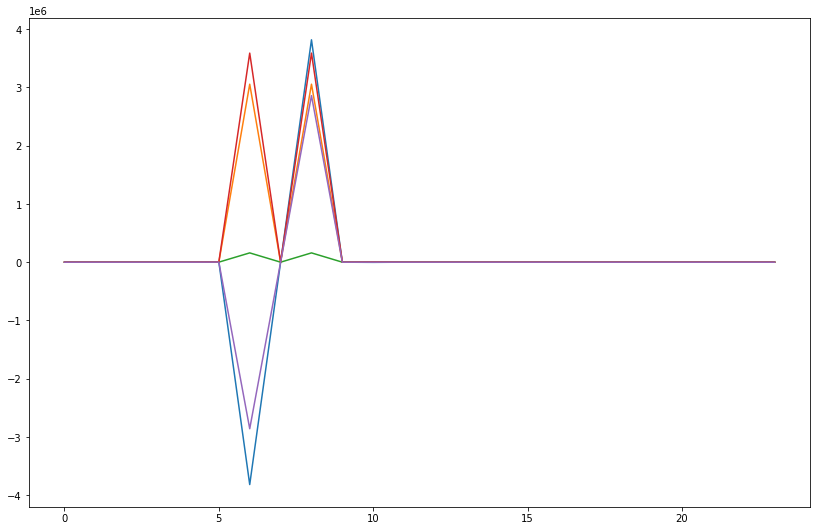

In [6]:
target_channels = ["FC6", "FT8", "C5", "CP3", "P3"] # , "T7", "CP5", "C3", "CP1", "C4"]
plot_eeg("emg_active", target_channels, idx=0)

### Vocalised Speech (EEG)

knew
emg_data.shape: (1488,)


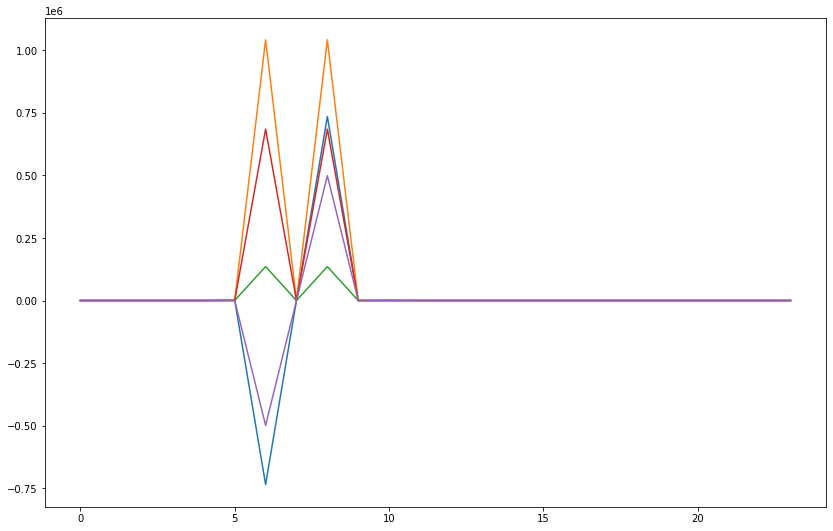

In [7]:
target_channels = ["FC6", "FT8", "C5", "CP3", "P3"] # , "T7", "CP5", "C3", "CP1", "C4"]
plot_eeg("emg_vocal", target_channels, idx=0)

### Rest State (EEG)

knew
emg_data.shape: (1488,)


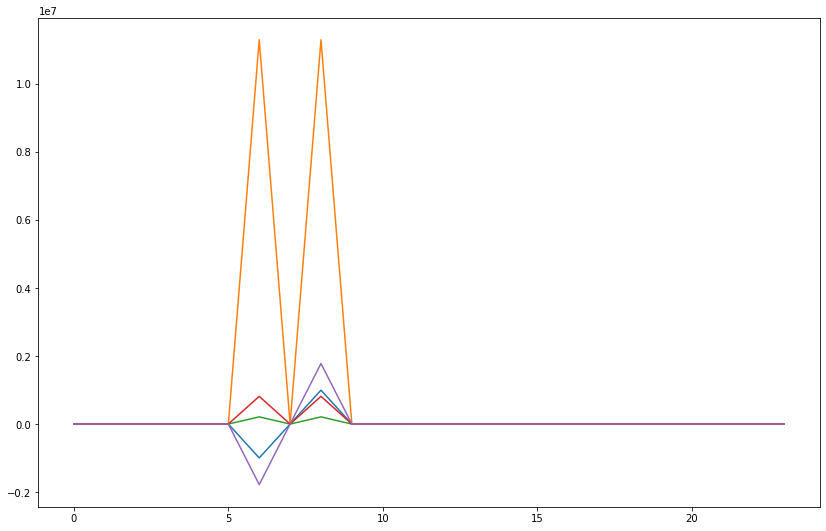

In [8]:
target_channels = ["FC6", "FT8", "C5", "CP3", "P3"] # , "T7", "CP5", "C3", "CP1", "C4"]
plot_eeg("emg_rest", target_channels, idx=0)

In [9]:
dataset.emg_data.ch_names.index("FC6")

21

### Raw Audio (Vocalised)

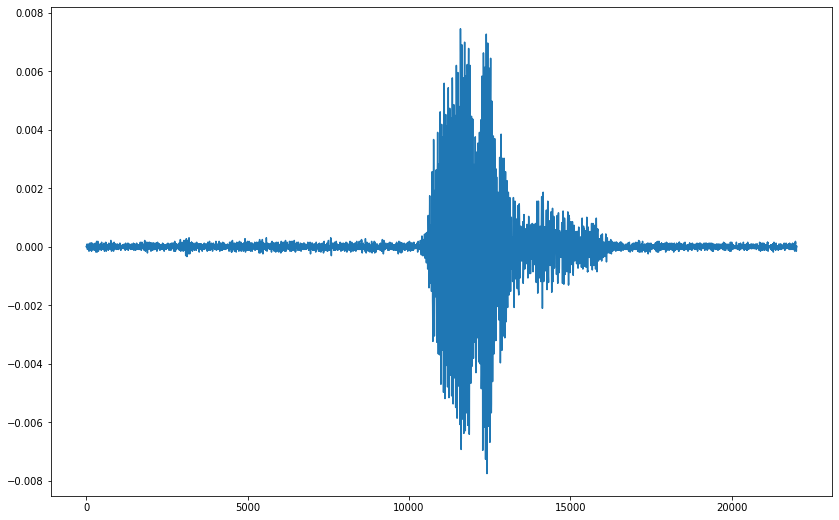

In [15]:
example = dataset[0]
plt.plot(example["audio_raw"])

### Mel Spectrogram of Audio (Vocalised)

In [16]:
from matplotlib import cm

def plot_mel_spectrogram(mel_spec, title):
    fig, ax = plt.subplots(1)

    ax.set_title(f"Mel Spectogram \"{title}\"")
    pred = np.swapaxes(mel_spec, 0, 1)
    cax = ax.imshow(pred, interpolation='nearest', cmap=cm.coolwarm, origin='lower')

    return fig

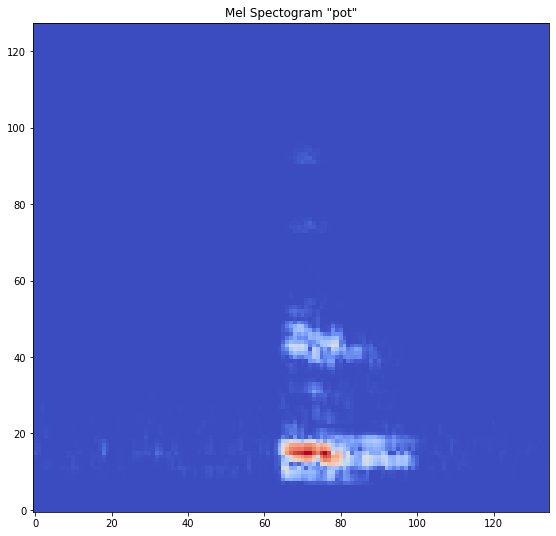

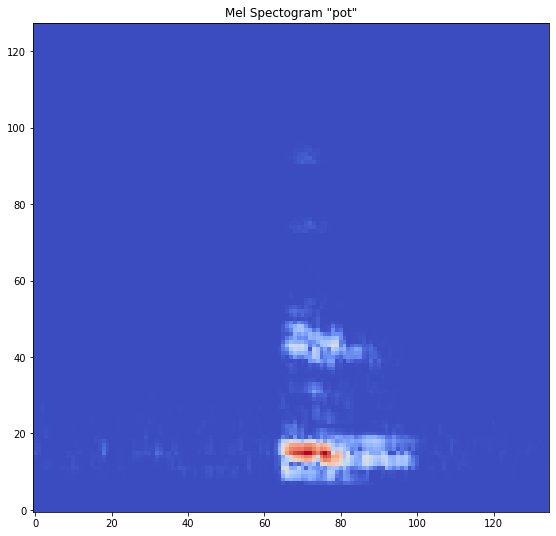

In [17]:
example_mel_spec = example["audio_feats"]
plot_mel_spectrogram(example_mel_spec, example["label"])

In [8]:
len(dataset)

1

## Single Channel Analysis

From: [Paper](http://www.cs.toronto.edu/~complingweb/data/karaOne/ZhaoRudzicz15.pdf)

Pearson correlation coefficients between audio features and imagined speech EEG features

|Sensor | FC6    | FT8 |  C5 | CP3|  P3 |
| - | - | - | - | - | - |
|Mean r | 0.3781 | 0.3758 | 0.3728 | 0.3720 | 0.3696 |

| Sensor | T7 | CP5 | C3 | CP1 |C4 |
| - | - | - | - | - | - |
Mean r | 0.3686|  0.3685|  0.3659| 0.3626 |0.3623